In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Data_frame.csv', sep=';', encoding='UTF-8')

In [ ]:
df.columns

Index(['Municipio', 'Data', 'ano', 'mês', 'INPC', 'Preco_medio_CB',
       'IPCA_Geral', 'IGP_10_geral', 'Inflacao_renda_muito_baixa',
       'Inflacao_renda_baixa', 'Inflacao_renda_media_baixa',
       'Inflacao_renda_media', 'Inflacao_renda_media_alta',
       'Inflacao_renda_alta', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio',
       'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro',
       'Dezembro'],
      dtype='object')

#Tratamento do DataFrame

In [ ]:
# Trocando as virgulas por . e convertendo para float

df['INPC'] = df['INPC'].apply(lambda x: str(x).replace(",","."))
df['INPC'] = df['INPC'].apply(lambda x: float(x))

df['Preco_medio_CB'] = df['Preco_medio_CB'].apply(lambda x: str(x).replace(",","."))
df['Preco_medio_CB'] = df['Preco_medio_CB'].apply(lambda x: float(x))

df['IPCA_Geral'] = df['IPCA_Geral'].apply(lambda x: str(x).replace(",","."))
df['IPCA_Geral'] = df['IPCA_Geral'].apply(lambda x: float(x))

df['IGP_10_geral'] = df['IGP_10_geral'].apply(lambda x: str(x).replace(",","."))
df['IGP_10_geral'] = df['IGP_10_geral'].apply(lambda x: float(x))

df['Inflacao_renda_muito_baixa'] = df['Inflacao_renda_muito_baixa'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_muito_baixa'] = df['Inflacao_renda_muito_baixa'].apply(lambda x: float(x))

df['Inflacao_renda_baixa'] = df['Inflacao_renda_baixa'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_baixa'] = df['Inflacao_renda_baixa'].apply(lambda x: float(x))

df['Inflacao_renda_media_baixa'] = df['Inflacao_renda_media_baixa'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_media_baixa'] = df['Inflacao_renda_media_baixa'].apply(lambda x: float(x))

df['Inflacao_renda_media'] = df['Inflacao_renda_media'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_media'] = df['Inflacao_renda_media'].apply(lambda x: float(x))

df['Inflacao_renda_media_alta'] = df['Inflacao_renda_media_alta'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_media_alta'] = df['Inflacao_renda_media_alta'].apply(lambda x: float(x))

df['Inflacao_renda_alta'] = df['Inflacao_renda_alta'].apply(lambda x: str(x).replace(",","."))
df['Inflacao_renda_alta'] = df['Inflacao_renda_alta'].apply(lambda x: float(x))




# Estatísticas descritivas da amostra


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f426fbb2950>]],
      dtype=object)

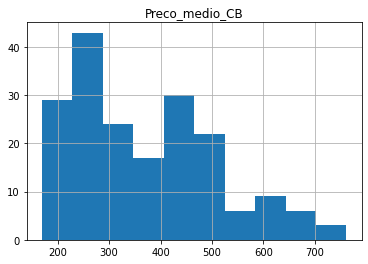

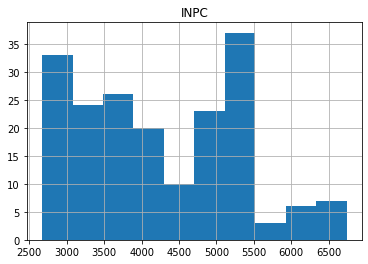

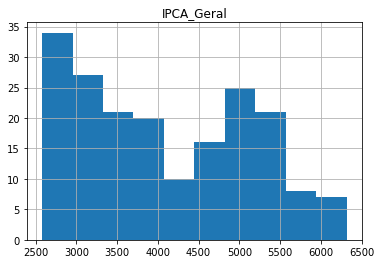

In [ ]:

# Representação da distribuição de dados: histograma do preço médio da cesta básica, Indice nacinal de preço ao consumidor (INPC)

df[['Preco_medio_CB']].hist()
df[['INPC']].hist()
df[['IPCA_Geral']].hist()

In [ ]:
# Verificação da média, mediana e desvio padrão do preço médio da cesta básica, INPC e IPCA_Geral

media_preco_cb = df[['Preco_medio_CB']].mean()
media_INPC = df[['INPC']].mean()
media_IPCA = df[['IPCA_Geral']].mean()


mediana_preco_cb = df[['Preco_medio_CB']].median()
mediana_INPC = df[['INPC']].median()
mediana_IPCA = df[['IPCA_Geral']].median()

dp_preco_cb = df[['Preco_medio_CB']].std()
dp_INPC = df[['INPC']].std()
dp_IPCA = df[['IPCA_Geral']].std()


print(media_preco_cb,media_INPC,media_IPCA)
print(mediana_preco_cb,mediana_INPC,mediana_IPCA)
print(dp_preco_cb,dp_INPC,dp_IPCA)






Preco_medio_CB    370.884392
dtype: float64 INPC    4257.422169
dtype: float64 IPCA_Geral    4077.560899
dtype: float64
Preco_medio_CB    344.3
dtype: float64 INPC    4105.02
dtype: float64 IPCA_Geral    3942.55
dtype: float64
Preco_medio_CB    139.786979
dtype: float64 INPC    1073.817801
dtype: float64 IPCA_Geral    1043.380492
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f426fafd750>,
      dtype=object)

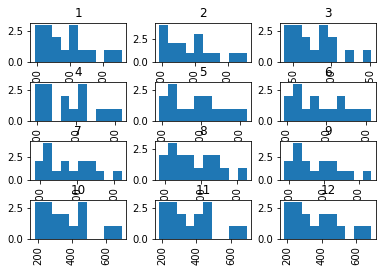

In [ ]:
# Distribuição variável númerica pelo mês

df.hist(by='mês', column='Preco_medio_CB')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


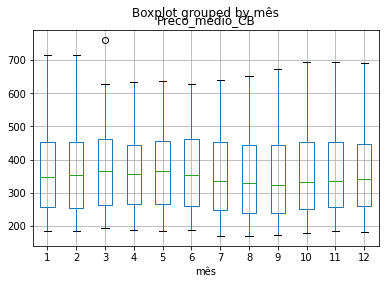

In [ ]:
# Boxplot do preço médio da cesta básica por mês

df.boxplot(['Preco_medio_CB'], by='mês')

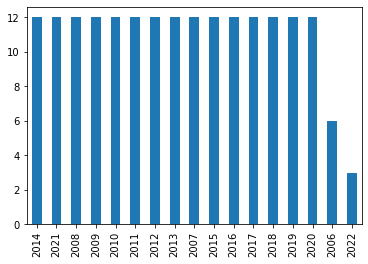

In [ ]:
# Distribuição de variável ano

df['ano'].value_counts().plot(kind='bar')

In [ ]:
#Verificando a correação de todas as colunas

todos = df.corr()
print(todos)

                                Data       ano       mês      INPC  \
Data                        1.000000  0.999971 -0.076413  0.983772   
ano                         0.999971  1.000000 -0.083979  0.983345   
mês                        -0.076413 -0.083979  1.000000 -0.022735   
INPC                        0.983772  0.983345 -0.022735  1.000000   
Preco_medio_CB              0.962286  0.962051 -0.046315  0.971637   
IPCA_Geral                  0.991083  0.990673 -0.025674  0.995601   
IGP_10_geral                0.357591  0.357070  0.039719  0.276068   
Inflacao_renda_muito_baixa  0.065741  0.065739 -0.004975  0.087412   
Inflacao_renda_baixa        0.100644  0.100657 -0.009776  0.124452   
Inflacao_renda_media_baixa  0.114042  0.114065 -0.012177  0.143363   
Inflacao_renda_media        0.147709  0.148180 -0.073768  0.178248   
Inflacao_renda_media_alta   0.160454  0.161482 -0.147909  0.188752   
Inflacao_renda_alta         0.019255  0.020465 -0.160499  0.046786   
Janeiro             

In [ ]:
# Exibindo colunas com alta correlação

df[['Preco_medio_CB','INPC','IPCA_Geral','ano']].corr()

,Preco_medio_CB,INPC,IPCA_Geral,ano
Preco_medio_CB,1.000000,0.971637,0.977742,0.962051
INPC,0.971637,1.000000,0.995601,0.983345
IPCA_Geral,0.977742,0.995601,1.000000,0.990673
ano,0.962051,0.983345,0.990673,1.000000


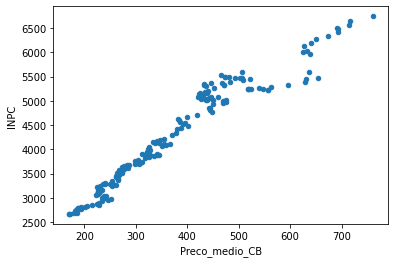

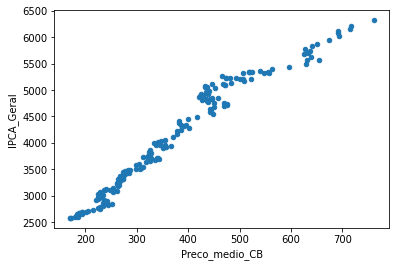

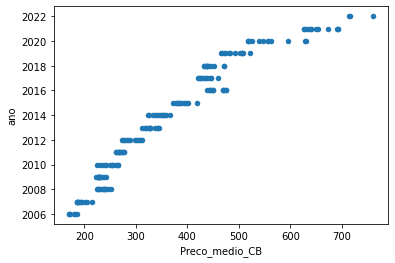

In [ ]:
# Gráfico de dispersão - analisar as correlações de forma visial

df.plot.scatter(x='Preco_medio_CB',y='INPC')
df.plot.scatter(x='Preco_medio_CB',y='IPCA_Geral')
df.plot.scatter(x='Preco_medio_CB',y='ano')

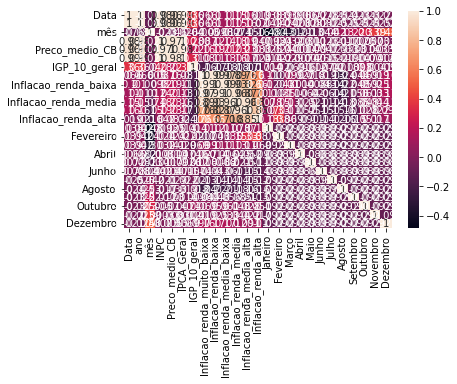

In [ ]:
# Matriz de correlação Gráfica
sn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#Análise para construção do modelo de regreção linear utilizando como variavel dependente o preço da cesta básica

mod = LinearRegression()
Y = df.iloc[:,[5]]
X = df.iloc[:,[2,4,6]]

mod.fit(X,Y)

OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Preco_medio_CB   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.142e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   1.40e-210
Time:                        20:38:57   Log-Likelihood:                         -905.35
No. Observations:                 189   AIC:                                      1817.
Df Residuals:                     186   BIC:                                      1826.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ano           -0.0807      0.004    -18.321      0.000      -0.089      -0.072
INPC          -0.0269      0.021     -1.262      0.208      -0.069       0.015
IPCA_Geral     0.1589      0.022      7.256      0.000       0.116       0.202
==============================================================================
Omnibus:                       10.502   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.412
Skew:                           0.424   Prob(JB):                      0.00202
Kurtosis:                       3.925   Cond. No.                         91.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""